In [1]:
import os
os.getcwd()

'C:\\Users\\AbhilashMandadhi\\Desktop\\Data Sets\\ML project'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
h_data = pd.read_csv("diabetic_data.csv")
h_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
h_data.apply(lambda x: sum(x.isnull()),axis=0)

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [4]:
h_data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
print("Total Number of Rows : "+format(len(h_data)))
print("Missing values in patient_nbr : "+format(len(h_data.loc[h_data['patient_nbr']=='?'])))
print("Missing values in race: "+format(len(h_data.loc[h_data['race']=='?'])))
print("Missing values in gender: "+format(len(h_data.loc[h_data['gender']=='?'])))
print("Missing values in age: "+format(len(h_data.loc[h_data['age']=='?'])))
print("Missing values in weight: "+format(len(h_data.loc[h_data['weight']=='?'])))
print("Missing values in admission_type_id: "+format(len(h_data.loc[h_data['admission_type_id']=='?'])))
print("Missing values in discharge_disposition_id: "+format(len(h_data.loc[h_data['discharge_disposition_id']=='?'])))


Total Number of Rows : 101766
Missing values in patient_nbr : 0
Missing values in race: 2273
Missing values in gender: 0
Missing values in age: 0
Missing values in weight: 98569
Missing values in admission_type_id: 0
Missing values in discharge_disposition_id: 0


C:\Users\AbhilashMandadhi\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
print((h_data.astype(str) != '?').all(axis=0))

encounter_id                 True
patient_nbr                  True
race                        False
gender                       True
age                          True
weight                      False
admission_type_id            True
discharge_disposition_id     True
admission_source_id          True
time_in_hospital             True
payer_code                  False
medical_specialty           False
num_lab_procedures           True
num_procedures               True
num_medications              True
number_outpatient            True
number_emergency             True
number_inpatient             True
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses             True
max_glu_serum                True
A1Cresult                    True
metformin                    True
repaglinide                  True
nateglinide                  True
chlorpropamide               True
glimepiride                  True
acetohexamide 

In [7]:
h_data["weight"].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [8]:
h_data['weight'].replace(["?","[75-100)","[50-75)","[100-125)","[125-150)", "[25-50)", "[0-25)","[150-175)", "[175-200)", ">200" ],[25,75,50,100,125,25,0,150,175,200],inplace=True)
h_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),25,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),25,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),25,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),25,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),25,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),25,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),25,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),25,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),25,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [9]:
h_data['weight'] = h_data['weight'].astype(int)

In [10]:
h_data["age"].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [11]:
h_data['age'].replace(["[70-80)","[60-70)","[50-60)","[80-90)","[40-50)", "[30-40)", "[90-100)","[20-30)", "[10-20)", "[0-10)" ],[70,60,50,80,40,30,90,20,10,0],inplace=True)
h_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0,25,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10,25,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,25,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30,25,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40,25,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,70,25,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,80,25,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,70,25,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,80,25,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [12]:
h_data['age'] = h_data['age'].astype(int)

In [13]:
h_data["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [14]:
h_data['race'].replace(["?"],['Caucasian'],inplace=True)
h_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0,25,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10,25,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,25,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30,25,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40,25,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,70,25,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,80,25,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,70,25,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,80,25,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [15]:
h_data["gender"].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [16]:
h_data['gender'].replace(["Unknown/Invalid"],['Female'],inplace=True)
h_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0,25,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10,25,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,25,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30,25,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40,25,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,70,25,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,80,25,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,70,25,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,80,25,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [17]:
h_data["medical_specialty"].value_counts()

?                                   49949
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
                                    ...  
Perinatology                            1
Surgery-PlasticwithinHeadandNeck        1
SportsMedicine                          1
Dermatology                             1
Proctology                              1
Name: medical_specialty, Length: 73, dtype: int64

In [18]:
h_data['medical_specialty'].replace(["?"],['InternalMedicine'],inplace=True)

In [19]:
h_data["payer_code"].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [20]:
h_data['payer_code'].replace(["?"],['MC'],inplace=True)

In [21]:
h_data["diag_1"].value_counts()

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
381       1
691       1
366       1
690       1
143       1
Name: diag_1, Length: 717, dtype: int64

In [22]:
h_data['diag_1'].replace(["?"],[428],inplace=True)

In [23]:
h_data["diag_2"].value_counts()

276    6752
428    6662
250    6071
427    5036
401    3736
       ... 
232       1
115       1
915       1
734       1
987       1
Name: diag_2, Length: 749, dtype: int64

In [24]:
h_data['diag_2'].replace(["?"],[276],inplace=True)

In [25]:
h_data["diag_3"].value_counts()

250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
884         1
395         1
E886        1
75          1
987         1
Name: diag_3, Length: 790, dtype: int64

In [26]:
h_data['diag_3'].replace(["?"],[250],inplace=True)
h_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0,25,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10,25,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,25,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30,25,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40,25,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,70,25,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,80,25,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,70,25,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,80,25,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [27]:
print((h_data.astype(str) != '?').all(axis=0))

encounter_id                True
patient_nbr                 True
race                        True
gender                      True
age                         True
weight                      True
admission_type_id           True
discharge_disposition_id    True
admission_source_id         True
time_in_hospital            True
payer_code                  True
medical_specialty           True
num_lab_procedures          True
num_procedures              True
num_medications             True
number_outpatient           True
number_emergency            True
number_inpatient            True
diag_1                      True
diag_2                      True
diag_3                      True
number_diagnoses            True
max_glu_serum               True
A1Cresult                   True
metformin                   True
repaglinide                 True
nateglinide                 True
chlorpropamide              True
glimepiride                 True
acetohexamide               True
glipizide 

In [28]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null int32
weight                      101766 non-null int32
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 

In [29]:
h_data['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [30]:
h_data['diabetesMed'].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [31]:
#h_data['diabetesMed'].replace(["Yes","No"],[0,1],inplace=True)


In [32]:
h_data['gender'].replace(["Male","Female"],[0,1],inplace=True)


In [33]:
h_data['readmitted'].replace(["NO",">30","<30"],[0,1,2],inplace=True)


In [34]:
h_data.describe()

,encounter_id,patient_nbr,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,0.537616,60.967022,26.532437,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.572480
std,1.026403e+08,3.869636e+07,0.498586,15.940838,9.684005,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.684068
min,1.252200e+04,1.350000e+02,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.496119e+07,2.341322e+07,0.000000,50.000000,25.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1.523890e+08,4.550514e+07,1.000000,60.000000,25.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,2.302709e+08,8.754595e+07,1.000000,70.000000,25.000000,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,4.438672e+08,1.895026e+08,1.000000,90.000000,200.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,2.000000


In [35]:
h_data.corr()

,encounter_id,patient_nbr,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
encounter_id,1.000000,0.512028,-0.005992,0.071716,-0.004989,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149,-0.031806
patient_nbr,0.512028,1.000000,-0.006617,0.070991,0.070469,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847,0.057623
gender,-0.005992,-0.006617,1.000000,0.050584,-0.021097,-0.014623,0.020946,0.003822,0.029890,0.003049,-0.059896,0.022030,0.011448,0.021058,0.014585,0.003320,0.014436
age,0.071716,0.070991,0.050584,1.000000,-0.001022,-0.007209,0.114323,0.044696,0.107515,0.020770,-0.030104,0.041847,0.023724,-0.087291,-0.042861,0.242597,0.030271
weight,-0.004989,0.070469,-0.021097,-0.001022,1.000000,0.030894,-0.031864,0.000455,0.018618,0.076476,0.019002,0.010549,0.093823,0.005150,-0.011604,0.050389,0.027512
admission_type_id,-0.158961,-0.011128,-0.014623,-0.007209,0.030894,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126,-0.008950
discharge_disposition_id,-0.132876,-0.136814,0.020946,0.114323,-0.031864,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891,0.012450
admission_source_id,-0.112402,-0.032568,0.003822,0.044696,0.000455,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114,0.031816
time_in_hospital,-0.062221,-0.024092,0.029890,0.107515,0.018618,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186,0.057718
num_lab_procedures,-0.026062,0.015946,0.003049,0.020770,0.076476,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773,0.037976


In [36]:
h_data.cov()

,encounter_id,patient_nbr,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
encounter_id,1.053503e+16,2.033677e+15,-306631.877490,1.173395e+08,-4.959073e+06,-2.358289e+07,-7.201319e+07,-4.688716e+07,-1.906392e+07,-5.262982e+07,-2.490548e+06,6.349488e+07,1.349577e+07,7.907967e+06,4.013309e+06,5.262284e+07,-2.233165e+06
patient_nbr,2.033677e+15,1.497408e+15,-127663.043613,4.379123e+07,2.640736e+07,-6.224166e+05,-2.795424e+07,-5.121875e+06,-2.782956e+06,1.214034e+07,-1.027757e+06,6.499150e+06,5.069566e+06,2.245038e+06,6.098915e+05,1.697340e+07,1.525345e+06
gender,-3.066319e+05,-1.276630e+05,0.248588,4.020364e-01,-1.018638e-01,-1.053796e-02,5.514198e-02,7.743492e-03,4.448644e-02,2.990602e-02,-5.094077e-02,8.927313e-02,7.233340e-03,9.769400e-03,9.183449e-03,3.201113e-03,4.923565e-03
age,1.173395e+08,4.379123e+07,0.402036,2.541103e+02,-1.577865e-01,-1.660928e-01,9.622598e+00,2.895651e+00,5.116110e+00,6.514106e+00,-8.185807e-01,5.421710e+00,4.792567e-01,-1.294738e+00,-8.628314e-01,7.477632e+00,3.300962e-01
weight,-4.959073e+06,2.640736e+07,-0.101864,-1.577865e-01,9.377995e+01,4.324302e-01,-1.629286e+00,1.789028e-02,5.382091e-01,1.457068e+01,3.139002e-01,8.302795e-01,1.151415e+00,4.640537e-02,-1.419103e-01,9.435412e-01,1.822507e-01
admission_type_id,-2.358289e+07,-6.224166e+05,-0.010538,-1.660928e-01,4.324302e-01,2.089189e+00,6.371413e-01,6.265112e-01,-5.393206e-02,-4.086834e+00,3.202480e-01,9.343452e-01,4.855953e-02,-2.570937e-02,-6.965742e-02,-3.273466e-01,-8.849493e-03
discharge_disposition_id,-7.201319e+07,-2.795424e+07,0.055142,9.622598e+00,-1.629286e+00,6.371413e-01,2.788015e+01,3.903983e-01,2.565205e+00,2.432424e+00,1.434002e-01,4.667127e+00,-5.831615e-02,-1.202281e-01,1.386135e-01,4.787441e-01,4.497053e-02
admission_source_id,-4.688716e+07,-5.121875e+06,0.007743,2.895651e+00,1.789028e-02,6.265112e-01,3.903983e-01,1.651675e+01,-8.450143e-02,3.908732e+00,-9.386640e-01,-1.801288e+00,1.403158e-01,2.264819e-01,1.863783e-01,5.666972e-01,8.845158e-02
time_in_hospital,-1.906392e+07,-2.782956e+06,0.044486,5.116110e+00,5.382091e-01,-5.393206e-02,2.565205e+00,-8.450143e-02,8.910868e+00,1.870261e+01,9.749771e-01,1.130922e+01,-3.372824e-02,-2.688944e-02,2.775411e-01,1.270916e+00,1.178617e-01
num_lab_procedures,-5.262982e+07,1.214034e+07,0.029906,6.514106e+00,1.457068e+01,-4.086834e+00,2.432424e+00,3.908732e+00,1.870261e+01,3.870805e+02,1.948719e+00,4.288014e+01,-1.895441e-01,-4.172888e-02,9.747363e-01,5.811858e+00,5.111094e-01


In [37]:
h_data.head(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,1,0,25,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,1,10,25,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,1,20,25,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,0,30,25,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,0,40,25,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,0,50,25,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,1
6,55842,84259809,Caucasian,0,60,25,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,0
7,63768,114882984,Caucasian,0,70,25,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,1
8,12522,48330783,Caucasian,1,80,25,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,0
9,15738,63555939,Caucasian,1,90,25,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [38]:
h_data['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [39]:
h_data['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [40]:
h_data.shape

(101766, 50)

In [41]:
h_data.pivot_table(h_data,index=['diabetesMed'])

,admission_source_id,admission_type_id,age,discharge_disposition_id,encounter_id,gender,num_lab_procedures,num_medications,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,patient_nbr,readmitted,time_in_hospital,weight
diabetesMed,,,,,,,,,,,,,,,,,
No,5.743281,2.024826,61.626287,3.994744,1.554695e+08,0.552151,41.903730,13.242063,1.361022,7.347648,0.153698,0.575482,0.331197,5.311024e+07,0.500748,4.054480,27.017904
Yes,5.757768,2.023761,60.770134,3.632288,1.681081e+08,0.533275,43.451603,16.852022,1.333372,7.444993,0.211018,0.653510,0.380754,5.469480e+07,0.593903,4.497977,26.387453


In [42]:
h_data.pivot_table(h_data,index=['gender'])

,admission_source_id,admission_type_id,age,discharge_disposition_id,encounter_id,num_lab_procedures,num_medications,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,patient_nbr,readmitted,time_in_hospital,weight
gender,,,,,,,,,,,,,,,,
0,5.73769,2.046796,60.097545,3.596387,1.658648e+08,43.030964,15.828775,1.449899,7.415684,0.176708,0.615705,0.353714,5.460650e+07,0.561832,4.299777,26.752736
1,5.76884,2.004405,61.714829,3.818208,1.646313e+08,43.151268,16.187896,1.244978,7.428561,0.216008,0.652648,0.382812,5.409294e+07,0.581638,4.478734,26.342966


In [43]:
h_data.pivot_table(h_data,index=['readmitted'])

,admission_source_id,admission_type_id,age,discharge_disposition_id,encounter_id,gender,num_lab_procedures,num_medications,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,patient_nbr,time_in_hospital,weight
readmitted,,,,,,,,,,,,,,,,
0,5.604185,2.030585,60.518920,3.788149,1.688332e+08,0.529327,42.381598,15.670367,1.410305,7.221366,0.109216,0.381963,0.273112,5.167949e+07,4.254429,26.183836
1,5.965030,2.029034,61.405261,3.363061,1.603845e+08,0.549107,43.836601,16.282768,1.249599,7.646898,0.283669,0.838993,0.496329,5.814675e+07,4.495541,27.086791
2,5.821168,1.976490,61.760148,4.468874,1.627347e+08,0.541692,44.226028,16.903143,1.280884,7.692789,0.357313,1.224003,0.436911,5.519219e+07,4.768249,26.481465


In [44]:
#h_data[h_data["gender"].str.contains('Male')&h_data["medical_specialty"].str.contains('Emergency/Trauma')&h_data['readmitted'].str.contains('>30')&h_data['diabetesMed'].str.contains('Yes')]

In [45]:
#h_data[h_data["gender"].str.contains('Male')&h_data["medical_specialty"].str.contains('Emergency/Trauma')&h_data['readmitted'].str.contains('<30')&h_data['diabetesMed']]

In [46]:
#h_data[h_data["gender"].str.contains('Female')&h_data["medical_specialty"].str.contains('Emergency/Trauma')&h_data['readmitted'].str.contains('<30')&h_data['diabetesMed']]

In [47]:
# Visualization Graphs

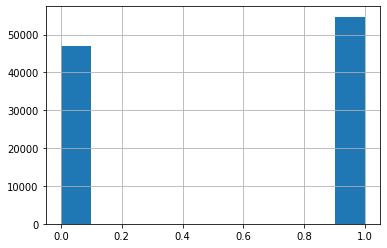

In [48]:
h_data['gender'].hist(bins=10)

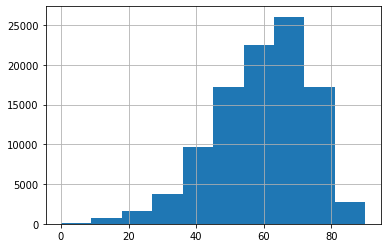

In [49]:
h_data['age'].hist(bins=10)

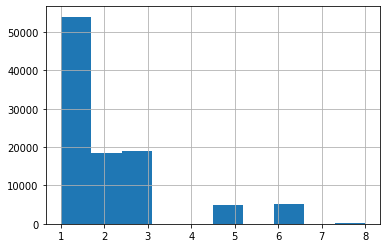

In [50]:
h_data['admission_type_id'].hist(bins=10)

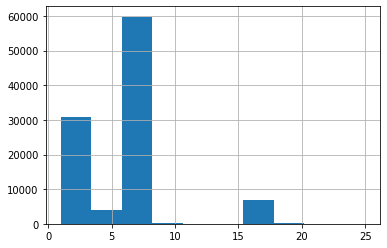

In [51]:
h_data['admission_source_id'].hist(bins=10)

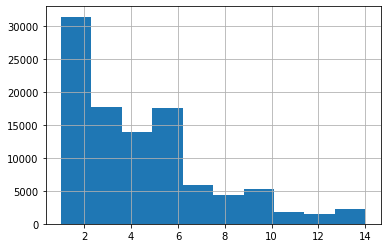

In [52]:
h_data['time_in_hospital'].hist(bins=10)

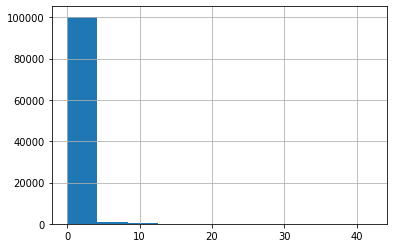

In [53]:
h_data['number_outpatient'].hist(bins=10)

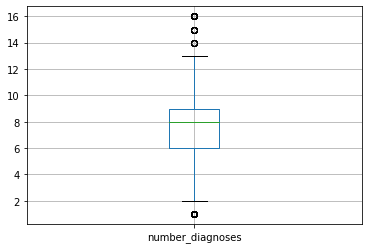

In [54]:
h_data.boxplot(column ='number_diagnoses')

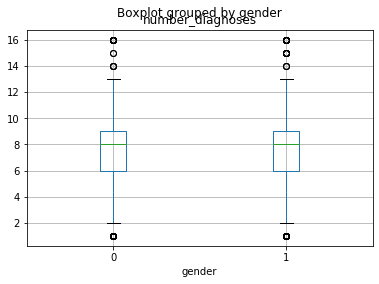

In [55]:
h_data.boxplot(column ='number_diagnoses', by='gender')

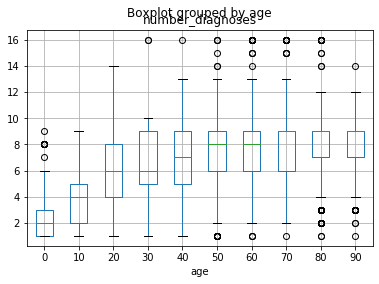

In [53]:
h_data.boxplot(column ='number_diagnoses', by='age')

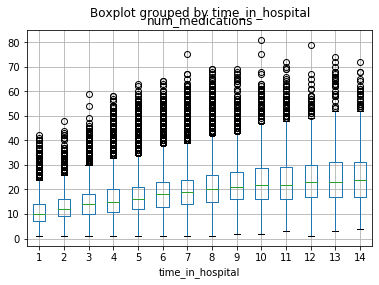

In [61]:
h_data.boxplot(column ='num_medications', by='time_in_hospital')

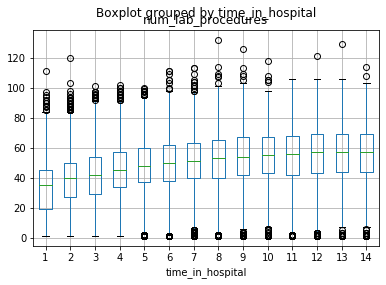

In [62]:
h_data.boxplot(column ='num_lab_procedures', by='time_in_hospital')

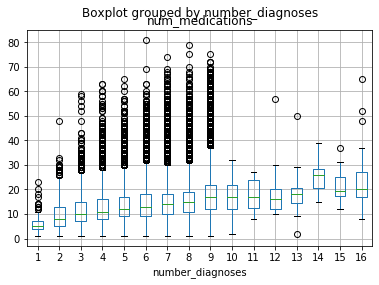

In [64]:
h_data.boxplot(column ='num_medications', by='number_diagnoses')

In [55]:
pd.crosstab(h_data['age'],h_data['gender'], margins=True)

gender,0,1,All
age,,,
0,78,83,161
10,289,402,691
20,543,1114,1657
30,1613,2162,3775
40,4874,4811,9685
50,8684,8572,17256
60,11421,11062,22483
70,12081,13987,26068
80,6682,10515,17197


In [56]:
pd.crosstab(h_data['number_diagnoses'],h_data['admission_type_id'], margins=True)

admission_type_id,1,2,3,4,5,6,7,8,All
number_diagnoses,,,,,,,,,
1,140,34,27,0,2,16,0,0,219
2,455,169,256,0,64,74,0,5,1023
3,1256,435,765,0,150,222,0,7,2835
4,2519,945,1491,0,241,314,0,27,5537
5,5272,2857,2044,3,385,627,3,202,11393
6,4589,1481,2291,2,456,1323,1,18,10161
7,5256,1617,2232,1,500,771,1,15,10393
8,5564,1673,2123,0,901,341,1,13,10616
9,28857,9264,7612,4,2086,1603,15,33,49474


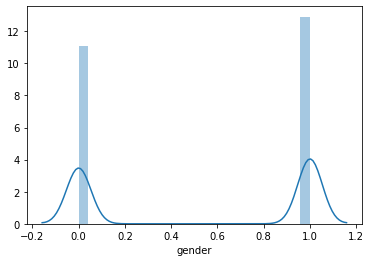

In [57]:
import seaborn as sns
sns.distplot(h_data['gender'])

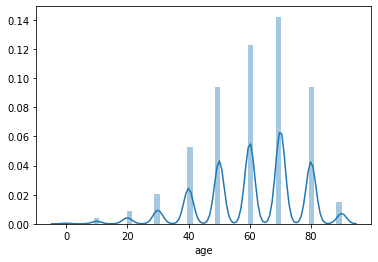

In [58]:
import seaborn as sns
sns.distplot(h_data['age'])

In [59]:
x = h_data.loc[:,['gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id','number_outpatient', 'number_emergency', 'number_inpatient']]
x

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,number_outpatient,number_emergency,number_inpatient
0,1,0,6,25,1,0,0,0
1,1,10,1,1,7,0,0,0
2,1,20,1,1,7,2,0,1
3,0,30,1,1,7,0,0,0
4,0,40,1,1,7,0,0,0
...,...,...,...,...,...,...,...,...
101761,0,70,1,3,7,0,0,0
101762,1,80,1,4,5,0,0,1
101763,0,70,1,1,7,1,0,0
101764,1,80,2,3,7,0,0,1


In [60]:
y= h_data.loc[:,['number_diagnoses']]
y

,number_diagnoses
0,1
1,9
2,6
3,7
4,5
...,...
101761,9
101762,9
101763,13
101764,9


In [61]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[1.        , 0.        , 0.71428571, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.11111111, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.22222222, 0.        , ..., 0.04761905, 0.        ,
        0.04761905],
       ...,
       [0.        , 0.77777778, 0.        , ..., 0.02380952, 0.        ,
        0.        ],
       [1.        , 0.88888889, 0.14285714, ..., 0.        , 0.        ,
        0.04761905],
       [0.        , 0.77777778, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [62]:
x

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,number_outpatient,number_emergency,number_inpatient
0,1,0,6,25,1,0,0,0
1,1,10,1,1,7,0,0,0
2,1,20,1,1,7,2,0,1
3,0,30,1,1,7,0,0,0
4,0,40,1,1,7,0,0,0
...,...,...,...,...,...,...,...,...
101761,0,70,1,3,7,0,0,0
101762,1,80,1,4,5,0,0,1
101763,0,70,1,1,7,1,0,0
101764,1,80,2,3,7,0,0,1


In [63]:
x.corr()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,number_outpatient,number_emergency,number_inpatient
gender,1.000000,0.050584,-0.014623,0.020946,0.003822,0.011448,0.021058,0.014585
age,0.050584,1.000000,-0.007209,0.114323,0.044696,0.023724,-0.087291,-0.042861
admission_type_id,-0.014623,-0.007209,1.000000,0.083483,0.106654,0.026511,-0.019116,-0.038161
discharge_disposition_id,0.020946,0.114323,0.083483,1.000000,0.018193,-0.008715,-0.024471,0.020787
admission_source_id,0.003822,0.044696,0.106654,0.018193,1.000000,0.027244,0.059892,0.036314
number_outpatient,0.011448,0.023724,0.026511,-0.008715,0.027244,1.000000,0.091459,0.107338
number_emergency,0.021058,-0.087291,-0.019116,-0.024471,0.059892,0.091459,1.000000,0.266559
number_inpatient,0.014585,-0.042861,-0.038161,0.020787,0.036314,0.107338,0.266559,1.000000


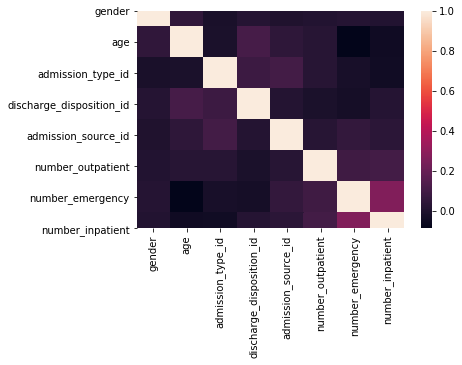

In [64]:
# Plot the correlation using heatmap
corr = x.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [65]:
import statsmodels.api as sm
model=sm.OLS(y,x).fit()

In [66]:
model

In [67]:
#Obtain model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       number_diagnoses   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                          1.388e+05
Date:                Fri, 10 Jan 2020   Prob (F-statistic):                        0.00
Time:                        07:26:23   Log-Likelihood:                     -2.2567e+05
No. Observations:              101766   AIC:                                  4.514e+05
Df Residuals:                  101758   BIC:                                  4.514e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
gender                       0.4368      0.014     31.819      0.000       0.410       0.464
age                          0.0953      0.000    384.405      0.000       0.095       0.096
admission_type_id            0.0944      0.005     20.281      0.000       0.085       0.104
discharge_disposition_id     0.0166      0.001     12.469      0.000       0.014       0.019
admission_source_id          0.1038      0.002     61.662      0.000       0.100       0.107
number_outpatient            0.1256      0.006     22.634      0.000       0.115       0.136
number_emergency             0.1845      0.008     23.626      0.000       0.169       0.200
number_inpatient             0.2610      0.006     45.680      0.000       0.250       0.272
==============================================================================
Omnibus:                     1097.663   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1133.240
Skew:                          -0.257   Prob(JB):                    8.32e-247
Kurtosis:                       3.052   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Split the data into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state =120) 

In [69]:
X_train

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,number_outpatient,number_emergency,number_inpatient
67433,1,80,3,1,7,0,0,2
29310,1,80,5,1,17,2,0,4
986,0,40,1,1,7,0,0,0
83415,1,30,1,1,7,0,0,1
72945,0,40,1,1,7,0,0,0
...,...,...,...,...,...,...,...,...
77182,0,80,1,11,7,0,0,0
99039,1,90,1,14,7,0,0,1
83102,0,60,1,1,7,0,0,2
42752,1,50,1,1,7,0,0,0


In [70]:
y_train

,number_diagnoses
67433,9
29310,7
986,6
83415,9
72945,9
...,...
77182,9
99039,6
83102,8
42752,8


In [71]:
# sc = preprocessing.MinMaxScaler(feature_range=(0,1))
# u = sc.fit_transform(X_train)
# v = sc.fit_transform(y_test)
# u.shape

In [72]:
# define the data/predictors as the pre-set feature names  
features = X_train.iloc[:,:].values
features

array([[ 1, 80,  3, ...,  0,  0,  2],
       [ 1, 80,  5, ...,  2,  0,  4],
       [ 0, 40,  1, ...,  0,  0,  0],
       ...,
       [ 0, 60,  1, ...,  0,  0,  2],
       [ 1, 50,  1, ...,  0,  0,  0],
       [ 1, 90,  5, ...,  0,  2,  1]], dtype=int64)

In [73]:
labels = y_train.iloc[:].values
labels

array([[9],
       [7],
       [6],
       ...,
       [8],
       [8],
       [9]], dtype=int64)

In [74]:
u=features
v=labels

In [75]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(u,v) 

In [76]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
predictions = model.predict(u)

In [78]:
accuracy=model.score(u,v)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.09822027209800921


In [79]:
#Define new data instance
unew = [[0,70,7, 15,18,5,1,1]]

#Make a Prediction
vnew = model.predict(unew)

#Show the inputs and predicted outputs
print("New Geneder,Age,Admin_ID=%s, Predicted Numw=%s" % (unew,vnew))

New Geneder,Age,Admin_ID=[[0, 70, 7, 15, 18, 5, 1, 1]], Predicted Numw=[[8.08663832]]


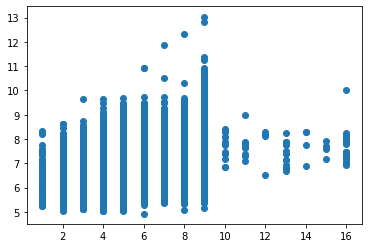

In [80]:
plt.scatter(v, predictions)

In [81]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score

# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")


import numpy as np
rmse = (np.sqrt(mean_squared_error(v,predictions)))
r2 = r2_score(v,predictions)

print("The model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Slope: [[-0.06681764  0.02933023 -0.16537748  0.00980525  0.03358546  0.11785115
   0.10191245  0.13117244]]
Intercept: [5.6172073]


The model performance
--------------------------------------
RMSE is 1.8411788651943568
R2 score is 0.09822027209800921


